In [6]:
from bada_dis_time import calculate_complete_descent_profile
import Utility

# 固定参数
cruise_fl = 370
target_fl = 30
aircraft_mass = 60000
ac_model = "A320-232"
low_cas = 0  # 设置为0，按您要求
low_cas_fl = 0  # 设置为0，按您要求
standard_route_length = 200  # 标准航线长度(nm)

# 要测试的参数
mach_values = [0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80]
cas_values = [250, 255,260,265, 270, 275,280,285, 290,295,300,305,310]

# 存储结果的列表
results = []

# 遍历所有组合
print("正在计算所有组合，请稍等...")
for descent_mach in mach_values:
    for high_cas in cas_values:
        # 计算巡航真空速和地速(假设零风)
        tas = Utility.mach2tas_kt(flight_level=cruise_fl, mach=descent_mach, delta_temp=0)
        gs = round(tas, 1)
        
        # 计算完整下降剖面
        try:
            _, Param, _, df, _ = calculate_complete_descent_profile(
                cruise_fl=cruise_fl,
                target_fl=target_fl,
                aircraft_mass=aircraft_mass,
                descent_mach=descent_mach,
                high_cas=high_cas,
                ac_model=ac_model,
                low_cas=low_cas,
                low_cas_fl=low_cas_fl,
                print_details=False
            )
            
            # 提取关键下降参数
            descent_distance = Param['Descent Distance (nm)']
            descent_time = Param['Descent Time (s)']
            
            # 计算总飞行时间
            cruise_distance = standard_route_length - descent_distance
            cruise_time = cruise_distance / gs * 3600  # 转换为秒(gs以节为单位)
            total_flight_time = cruise_time + descent_time  # 总时间(秒)
            
            # 将结果添加到列表
            results.append({
                'mach': descent_mach,
                'high_cas': high_cas,
                'total_time_sec': total_flight_time,
                'total_time_min': total_flight_time / 60
            })
        
        except Exception as e:
            print(f"计算出错 - Mach: {descent_mach:.2f}, High CAS: {high_cas}, 错误: {e}")

# 按总飞行时间排序(从短到长)
results.sort(key=lambda x: x['total_time_sec'])

# 输出排序后的结果
print("\n按总飞行时间排序的结果(从短到长):")
print("排名\tMach\tHigh CAS\t总飞行时间(秒)\t总飞行时间(分钟)")
print("----\t----\t--------\t--------------\t----------------")

for i, result in enumerate(results, 1):
    print(f"{i}\t{result['mach']:.2f}\t{result['high_cas']}\t\t{result['total_time_sec']:.2f}\t\t{result['total_time_min']:.2f}")

# 输出最快和最慢的组合
if results:
    fastest = results[0]
    slowest = results[-1]
    
    print("\n最快的组合:")
    print(f"Mach: {fastest['mach']:.2f}, High CAS: {fastest['high_cas']}")
    print(f"总飞行时间: {fastest['total_time_sec']:.2f}秒 ({fastest['total_time_min']:.2f}分钟)")
    
    print("\n最慢的组合:")
    print(f"Mach: {slowest['mach']:.2f}, High CAS: {slowest['high_cas']}")
    print(f"总飞行时间: {slowest['total_time_sec']:.2f}秒 ({slowest['total_time_min']:.2f}分钟)")
    
    print(f"\n最快与最慢之间的时间差: {slowest['total_time_sec'] - fastest['total_time_sec']:.2f}秒 ({(slowest['total_time_min'] - fastest['total_time_min']):.2f}分钟)")

正在计算所有组合，请稍等...

按总飞行时间排序的结果(从短到长):
排名	Mach	High CAS	总飞行时间(秒)	总飞行时间(分钟)
----	----	--------	--------------	----------------
1	0.80	310		1677.87		27.96
2	0.80	305		1688.83		28.15
3	0.79	310		1690.47		28.17
4	0.79	305		1700.99		28.35
5	0.80	300		1701.00		28.35
6	0.78	310		1703.24		28.39
7	0.79	300		1713.07		28.55
8	0.78	305		1714.34		28.57
9	0.80	295		1714.39		28.57
10	0.77	310		1717.80		28.63
11	0.78	300		1725.64		28.76
12	0.79	295		1727.01		28.78
13	0.77	305		1727.21		28.79
14	0.80	290		1729.99		28.83
15	0.76	310		1731.12		28.85
16	0.78	295		1738.57		28.98
17	0.77	300		1739.09		28.98
18	0.79	290		1741.14		29.02
19	0.76	305		1741.43		29.02
20	0.75	310		1746.60		29.11
21	0.80	285		1746.87		29.11
22	0.77	295		1751.34		29.19
23	0.76	300		1752.69		29.21
24	0.78	290		1753.26		29.22
25	0.75	305		1755.70		29.26
26	0.79	285		1757.69		29.29
27	0.74	310		1761.81		29.36
28	0.76	295		1764.52		29.41
29	0.77	290		1765.59		29.43
30	0.80	280		1765.91		29.43
31	0.75	300		1765.97		29.43
32	0.78	285		1769.

In [8]:
from bada_dis_time import calculate_complete_descent_profile
import Utility

# 固定参数
cruise_fl = 370
target_fl = 30
aircraft_mass = 60000
ac_model = "A320-232"
standard_route_length = 200  # 标准航线长度(nm)

# 要测试的参数
mach_values = [0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80]
cas_values = [250,255, 260, 265,270, 275,280,285, 290,295,300,305,310]

# 低速CAS和低速飞行高度的组合
low_cas_combinations = [
    {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
    {'low_cas': 220, 'low_cas_fl': 150, 'description': 'FL150低速转换'},
    {'low_cas': 220, 'low_cas_fl': 140, 'description': 'FL140低速转换'},
    {'low_cas': 220, 'low_cas_fl': 130, 'description': 'FL130低速转换'},
    {'low_cas': 220, 'low_cas_fl': 120, 'description': 'FL120低速转换'},
    {'low_cas': 220, 'low_cas_fl': 110, 'description': 'FL110低速转换'},
    {'low_cas': 220, 'low_cas_fl': 100, 'description': 'FL100低速转换'},
    {'low_cas': 220, 'low_cas_fl': 90, 'description': 'FL090低速转换'},
    {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
    {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
]

# 存储结果的列表
results = []

# 遍历所有组合
print("正在计算所有组合，请稍等...\n")
total_combinations = len(mach_values) * len(cas_values) * len(low_cas_combinations)
print(f"总计算组合数: {total_combinations}\n")

count = 0
for low_cas_config in low_cas_combinations:
    low_cas = low_cas_config['low_cas']
    low_cas_fl = low_cas_config['low_cas_fl']
    low_cas_desc = low_cas_config['description']
    
    print(f"正在计算: {low_cas_desc} (low_cas={low_cas}, low_cas_fl={low_cas_fl})...")
    
    for descent_mach in mach_values:
        for high_cas in cas_values:
            count += 1
            print(f"进度: {count}/{total_combinations} - Mach {descent_mach:.2f}, High CAS {high_cas}, {low_cas_desc}", end="\r")
            
            # 计算巡航真空速和地速(假设零风)
            tas = Utility.mach2tas_kt(flight_level=cruise_fl, mach=descent_mach, delta_temp=0)
            gs = round(tas, 1)
            
            # 计算完整下降剖面
            try:
                _, Param, _, df, _ = calculate_complete_descent_profile(
                    cruise_fl=cruise_fl,
                    target_fl=target_fl,
                    aircraft_mass=aircraft_mass,
                    descent_mach=descent_mach,
                    high_cas=high_cas,
                    ac_model=ac_model,
                    low_cas=low_cas,
                    low_cas_fl=low_cas_fl,
                    print_details=False
                )
                
                # 提取关键下降参数
                descent_distance = Param['Descent Distance (nm)']
                descent_time = Param['Descent Time (s)']
                
                # 计算总飞行时间
                cruise_distance = standard_route_length - descent_distance
                cruise_time = cruise_distance / gs * 3600  # 转换为秒(gs以节为单位)
                total_flight_time = cruise_time + descent_time  # 总时间(秒)
                
                # 将结果添加到列表
                results.append({
                    'mach': descent_mach,
                    'high_cas': high_cas,
                    'low_cas': low_cas,
                    'low_cas_fl': low_cas_fl,
                    'low_cas_desc': low_cas_desc,
                    'total_time_sec': total_flight_time,
                    'total_time_min': total_flight_time / 60
                })
            
            except Exception as e:
                print(f"\n计算出错 - Mach: {descent_mach:.2f}, High CAS: {high_cas}, {low_cas_desc}, 错误: {e}")
    
    print()  # 换行

print("\n所有组合计算完成！\n")

# 按总飞行时间排序(从短到长)
results.sort(key=lambda x: x['total_time_sec'])

# 输出排序后的结果
print("按总飞行时间排序的结果(从短到长):")
print("排名\tMach\tHigh CAS\t低速CAS\t低速FL\t总飞行时间(秒)\t总飞行时间(分钟)\t配置描述")
print("----\t----\t--------\t------\t------\t--------------\t----------------\t--------")

for i, result in enumerate(results, 1):
    print(f"{i}\t{result['mach']:.2f}\t{result['high_cas']}\t\t{result['low_cas']}\t{result['low_cas_fl']}\t{result['total_time_sec']:.2f}\t\t{result['total_time_min']:.2f}\t\t{result['low_cas_desc']}")

# 输出最快和最慢的组合
if results:
    fastest = results[0]
    slowest = results[-1]
    
    print("\n最快的组合:")
    print(f"Mach: {fastest['mach']:.2f}, High CAS: {fastest['high_cas']}, {fastest['low_cas_desc']} (low_cas={fastest['low_cas']}, low_cas_fl={fastest['low_cas_fl']})")
    print(f"总飞行时间: {fastest['total_time_sec']:.2f}秒 ({fastest['total_time_min']:.2f}分钟)")
    
    print("\n最慢的组合:")
    print(f"Mach: {slowest['mach']:.2f}, High CAS: {slowest['high_cas']}, {slowest['low_cas_desc']} (low_cas={slowest['low_cas']}, low_cas_fl={slowest['low_cas_fl']})")
    print(f"总飞行时间: {slowest['total_time_sec']:.2f}秒 ({slowest['total_time_min']:.2f}分钟)")
    
    print(f"\n最快与最慢之间的时间差: {slowest['total_time_sec'] - fastest['total_time_sec']:.2f}秒 ({(slowest['total_time_min'] - fastest['total_time_min']):.2f}分钟)")

# 分组比较不同低速配置的效果
print("\n不同低速配置的平均飞行时间比较:")
print("低速配置描述\t\t平均飞行时间(秒)\t平均飞行时间(分钟)")
print("------------\t\t--------------\t----------------")

for low_cas_config in low_cas_combinations:
    desc = low_cas_config['description']
    filtered_results = [r for r in results if r['low_cas_desc'] == desc]
    
    if filtered_results:
        avg_time_sec = sum(r['total_time_sec'] for r in filtered_results) / len(filtered_results)
        avg_time_min = avg_time_sec / 60
        print(f"{desc}\t\t{avg_time_sec:.2f}\t\t{avg_time_min:.2f}")

# 输出前20个最快的组合
print("\n前20个最快的组合:")
print("排名\tMach\tHigh CAS\t低速CAS\t低速FL\t总飞行时间(秒)\t总飞行时间(分钟)\t配置描述")
print("----\t----\t--------\t------\t------\t--------------\t----------------\t--------")

for i, result in enumerate(results[:20], 1):
    print(f"{i}\t{result['mach']:.2f}\t{result['high_cas']}\t\t{result['low_cas']}\t{result['low_cas_fl']}\t{result['total_time_sec']:.2f}\t\t{result['total_time_min']:.2f}\t\t{result['low_cas_desc']}")

# 输出前20个最慢的组合
print("\n前20个最慢的组合:")
print("排名\tMach\tHigh CAS\t低速CAS\t低速FL\t总飞行时间(秒)\t总飞行时间(分钟)\t配置描述")
print("----\t----\t--------\t------\t------\t--------------\t----------------\t--------")

for i, result in enumerate(sorted(results, key=lambda x: x['total_time_sec'], reverse=True)[:20], 1):
    print(f"{i}\t{result['mach']:.2f}\t{result['high_cas']}\t\t{result['low_cas']}\t{result['low_cas_fl']}\t{result['total_time_sec']:.2f}\t\t{result['total_time_min']:.2f}\t\t{result['low_cas_desc']}")

正在计算所有组合，请稍等...

总计算组合数: 1040

正在计算: 不使用低速CAS (low_cas=0, low_cas_fl=0)...
进度: 104/1040 - Mach 0.80, High CAS 310, 不使用低速CAS
正在计算: FL150低速转换 (low_cas=220, low_cas_fl=150)...
进度: 208/1040 - Mach 0.80, High CAS 310, FL150低速转换
正在计算: FL140低速转换 (low_cas=220, low_cas_fl=140)...
进度: 312/1040 - Mach 0.80, High CAS 310, FL140低速转换
正在计算: FL130低速转换 (low_cas=220, low_cas_fl=130)...
进度: 416/1040 - Mach 0.80, High CAS 310, FL130低速转换
正在计算: FL120低速转换 (low_cas=220, low_cas_fl=120)...
进度: 520/1040 - Mach 0.80, High CAS 310, FL120低速转换
正在计算: FL110低速转换 (low_cas=220, low_cas_fl=110)...
进度: 624/1040 - Mach 0.80, High CAS 310, FL110低速转换
正在计算: FL100低速转换 (low_cas=220, low_cas_fl=100)...
进度: 728/1040 - Mach 0.80, High CAS 310, FL100低速转换
正在计算: FL090低速转换 (low_cas=220, low_cas_fl=90)...
进度: 832/1040 - Mach 0.80, High CAS 310, FL090低速转换
正在计算: FL060低速转换 (low_cas=220, low_cas_fl=60)...
进度: 936/1040 - Mach 0.80, High CAS 310, FL060低速转换
正在计算: FL050低速转换 (low_cas=220, low_cas_fl=50)...
进度: 1040/1040 - Mach 0.80, High CAS 31

In [ ]:
from bada_dis_time import calculate_complete_descent_profile
import Utility

# 固定参数
cruise_fl = 370
target_fl = 30
aircraft_mass = 60000
ac_model = "A320-232"
standard_route_length = 200  # 标准航线长度(nm)

# 低速组 - 测试全套低速配置
low_mach_cas_groups = [
    {
        'mach': 0.73, 
        'cas_values': [245,250, 255, 260],
        'low_cas_configs': [
            {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
            {'low_cas': 220, 'low_cas_fl': 150, 'description': 'FL150低速转换'},
            {'low_cas': 220, 'low_cas_fl': 140, 'description': 'FL140低速转换'},
            {'low_cas': 220, 'low_cas_fl': 130, 'description': 'FL130低速转换'},
            {'low_cas': 220, 'low_cas_fl': 120, 'description': 'FL120低速转换'},
            {'low_cas': 220, 'low_cas_fl': 110, 'description': 'FL110低速转换'},
            {'low_cas': 220, 'low_cas_fl': 100, 'description': 'FL100低速转换'},
            {'low_cas': 220, 'low_cas_fl': 90, 'description': 'FL090低速转换'},
            {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
            {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
        ]
    }
]

# 中速组 - 仅测试FL060和FL050低速转换
mid_mach_cas_groups = [
    {
        'mach': 0.74, 
        'cas_values': [260, 265, 270],
        'low_cas_configs': [
            {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
            {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
        ]
    },
    {
        'mach': 0.75, 
        'cas_values': [270, 275, 280],
        'low_cas_configs': [
            {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
            {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
        ]
    },
    {
        'mach': 0.76, 
        'cas_values': [275, 280, 285],
        'low_cas_configs': [
            {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
            {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
        ]
    },
    {
        'mach': 0.77, 
        'cas_values': [280, 285, 290],
        'low_cas_configs': [
            {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
            {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
        ]
    },
    {
        'mach': 0.78, 
        'cas_values': [290, 295, 300],
        'low_cas_configs': [
            {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
            {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
        ]
    }
]

# 高速组 - 测试FL060和FL050低速转换，外加不使用低速转换的配置
high_mach_cas_groups = [
    {
        'mach': 0.79, 
        'cas_values': [295, 300, 305],
        'low_cas_configs': [
            {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},  # 新增：不使用低速转换
            {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
            {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
        ]
    },
    {
        'mach': 0.80, 
        'cas_values': [300, 305, 310],
        'low_cas_configs': [
            {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},  # 新增：不使用低速转换
            {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
            {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'},
             {'low_cas': 220, 'low_cas_fl': 40, 'description': 'FL050低速转换'}
        ]
    }
]

# 合并所有组
all_groups = low_mach_cas_groups + mid_mach_cas_groups + high_mach_cas_groups

# 计算总组合数
total_combinations = sum(
    len(group['cas_values']) * len(group['low_cas_configs']) 
    for group in all_groups
)

# 存储结果的列表
results = []

# 遍历所有组合
print("正在计算所有组合，请稍等...\n")
print(f"总计算组合数: {total_combinations}\n")

count = 0
for group in all_groups:
    descent_mach = group['mach']
    
    print(f"正在计算马赫数 {descent_mach:.2f} 组...")
    
    for high_cas in group['cas_values']:
        for low_cas_config in group['low_cas_configs']:
            low_cas = low_cas_config['low_cas']
            low_cas_fl = low_cas_config['low_cas_fl']
            low_cas_desc = low_cas_config['description']
            
            count += 1
            print(f"进度: {count}/{total_combinations} - Mach {descent_mach:.2f}, High CAS {high_cas}, {low_cas_desc}", end="\r")
            
            # 计算巡航真空速和地速(假设零风)
            tas = Utility.mach2tas_kt(flight_level=cruise_fl, mach=descent_mach, delta_temp=0)
            gs = round(tas, 1)
            
            # 计算完整下降剖面
            try:
                _, Param, _, df, _ = calculate_complete_descent_profile(
                    cruise_fl=cruise_fl,
                    target_fl=target_fl,
                    aircraft_mass=aircraft_mass,
                    descent_mach=descent_mach,
                    high_cas=high_cas,
                    ac_model=ac_model,
                    low_cas=low_cas,
                    low_cas_fl=low_cas_fl,
                    print_details=False
                )
                
                # 提取关键下降参数
                descent_distance = Param['Descent Distance (nm)']
                descent_time = Param['Descent Time (s)']
                
                # 计算总飞行时间
                cruise_distance = standard_route_length - descent_distance
                cruise_time = cruise_distance / gs * 3600  # 转换为秒(gs以节为单位)
                total_flight_time = cruise_time + descent_time  # 总时间(秒)
                
                # 将结果添加到列表
                results.append({
                    'mach': descent_mach,
                    'high_cas': high_cas,
                    'low_cas': low_cas,
                    'low_cas_fl': low_cas_fl,
                    'low_cas_desc': low_cas_desc,
                    'descent_distance': descent_distance,
                    'descent_time': descent_time,
                    'cruise_time': cruise_time,
                    'total_time_sec': total_flight_time,
                    'total_time_min': total_flight_time / 60
                })
            
            except Exception as e:
                print(f"\n计算出错 - Mach: {descent_mach:.2f}, High CAS: {high_cas}, {low_cas_desc}, 错误: {e}")
    
    print()  # 换行

print("\n所有组合计算完成！\n")

# 按总飞行时间排序(从短到长)
results.sort(key=lambda x: x['total_time_sec'])

# 输出排序后的结果
print("按总飞行时间排序的结果(从短到长):")
print("排名\tMach\tHigh CAS\t低速CAS\t低速FL\t总飞行时间(秒)\t总飞行时间(分钟)\t配置描述")
print("----\t----\t--------\t------\t------\t--------------\t----------------\t--------")

for i, result in enumerate(results, 1):
    print(f"{i}\t{result['mach']:.2f}\t{result['high_cas']}\t\t{result['low_cas']}\t{result['low_cas_fl']}\t{result['total_time_sec']:.2f}\t\t{result['total_time_min']:.2f}\t\t{result['low_cas_desc']}")

# 输出最快和最慢的组合
if results:
    fastest = results[0]
    slowest = results[-1]
    
    print("\n最快的组合:")
    print(f"Mach: {fastest['mach']:.2f}, High CAS: {fastest['high_cas']}, {fastest['low_cas_desc']} (low_cas={fastest['low_cas']}, low_cas_fl={fastest['low_cas_fl']})")
    print(f"总飞行时间: {fastest['total_time_sec']:.2f}秒 ({fastest['total_time_min']:.2f}分钟)")
    print(f"下降距离: {fastest['descent_distance']:.2f}nm, 下降时间: {fastest['descent_time']:.2f}秒, 巡航时间: {fastest['cruise_time']:.2f}秒")
    
    print("\n最慢的组合:")
    print(f"Mach: {slowest['mach']:.2f}, High CAS: {slowest['high_cas']}, {slowest['low_cas_desc']} (low_cas={slowest['low_cas']}, low_cas_fl={slowest['low_cas_fl']})")
    print(f"总飞行时间: {slowest['total_time_sec']:.2f}秒 ({slowest['total_time_min']:.2f}分钟)")
    print(f"下降距离: {slowest['descent_distance']:.2f}nm, 下降时间: {slowest['descent_time']:.2f}秒, 巡航时间: {slowest['cruise_time']:.2f}秒")
    
    print(f"\n最快与最慢之间的时间差: {slowest['total_time_sec'] - fastest['total_time_sec']:.2f}秒 ({(slowest['total_time_min'] - fastest['total_time_min']):.2f}分钟)")

# 分组比较不同马赫数的效果
print("\n不同马赫数的平均飞行时间比较:")
print("马赫数\t平均飞行时间(秒)\t平均飞行时间(分钟)\t样本数")
print("------\t--------------\t----------------\t------")

mach_values = sorted(set(result['mach'] for result in results))
for mach in mach_values:
    filtered_results = [r for r in results if r['mach'] == mach]
    
    if filtered_results:
        avg_time_sec = sum(r['total_time_sec'] for r in filtered_results) / len(filtered_results)
        avg_time_min = avg_time_sec / 60
        print(f"{mach:.2f}\t{avg_time_sec:.2f}\t\t{avg_time_min:.2f}\t\t{len(filtered_results)}")

# 输出前15个最快的组合
print("\n前15个最快的组合:")
print("排名\tMach\tHigh CAS\t低速CAS\t低速FL\t总飞行时间(秒)\t总飞行时间(分钟)\t配置描述")
print("----\t----\t--------\t------\t------\t--------------\t----------------\t--------")

for i, result in enumerate(results[:15], 1):
    print(f"{i}\t{result['mach']:.2f}\t{result['high_cas']}\t\t{result['low_cas']}\t{result['low_cas_fl']}\t{result['total_time_sec']:.2f}\t\t{result['total_time_min']:.2f}\t\t{result['low_cas_desc']}")

# 输出前15个最慢的组合
print("\n前15个最慢的组合:")
print("排名\tMach\tHigh CAS\t低速CAS\t低速FL\t总飞行时间(秒)\t总飞行时间(分钟)\t配置描述")
print("----\t----\t--------\t------\t------\t--------------\t----------------\t--------")

for i, result in enumerate(sorted(results, key=lambda x: x['total_time_sec'], reverse=True)[:15], 1):
    print(f"{i}\t{result['mach']:.2f}\t{result['high_cas']}\t\t{result['low_cas']}\t{result['low_cas_fl']}\t{result['total_time_sec']:.2f}\t\t{result['total_time_min']:.2f}\t\t{result['low_cas_desc']}")

# 对高速马赫数(0.79和0.80)比较有/无低速转换的效果
print("\n高速马赫数(0.79和0.80)有/无低速转换的效果比较:")
print("Mach\tHigh CAS\t不使用低速CAS(秒)\tFL060低速转换(秒)\tFL050低速转换(秒)\t最佳配置")
print("----\t--------\t----------------\t----------------\t----------------\t--------")

for mach in [0.79, 0.80]:
    for cas in (set(r['high_cas'] for r in results if r['mach'] == mach)):
        no_low_cas_results = [r for r in results if r['mach'] == mach and r['high_cas'] == cas and r['low_cas'] == 0]
        fl60_results = [r for r in results if r['mach'] == mach and r['high_cas'] == cas and r['low_cas_fl'] == 60]
        fl50_results = [r for r in results if r['mach'] == mach and r['high_cas'] == cas and r['low_cas_fl'] == 50]
        
        if no_low_cas_results and fl60_results and fl50_results:
            no_low_cas_time = no_low_cas_results[0]['total_time_sec']
            fl60_time = fl60_results[0]['total_time_sec']
            fl50_time = fl50_results[0]['total_time_sec']
            
            # 确定最佳配置
            times = [no_low_cas_time, fl60_time, fl50_time]
            configs = ["不使用低速CAS", "FL060低速转换", "FL050低速转换"]
            best_index = times.index(min(times))
            best_config = configs[best_index]
            
            print(f"{mach:.2f}\t{cas}\t\t{no_low_cas_time:.2f}\t\t{fl60_time:.2f}\t\t{fl50_time:.2f}\t\t{best_config}")

# 按照马赫数分组比较不同低速配置的效果
print("\n按马赫数分组的不同低速配置平均效果:")
print("马赫数\t配置描述\t\t平均飞行时间(秒)\t平均飞行时间(分钟)\t样本数")
print("------\t--------\t\t--------------\t----------------\t------")

for mach in mach_values:
    config_groups = {}
    
    for result in results:
        if result['mach'] == mach:
            desc = result['low_cas_desc']
            if desc not in config_groups:
                config_groups[desc] = []
            config_groups[desc].append(result)
    
    for desc, group_results in sorted(config_groups.items()):
        avg_time_sec = sum(r['total_time_sec'] for r in group_results) / len(group_results)
        avg_time_min = avg_time_sec / 60
        print(f"{mach:.2f}\t{desc}\t\t{avg_time_sec:.2f}\t\t{avg_time_min:.2f}\t\t{len(group_results)}")

正在计算所有组合，请稍等...

总计算组合数: 91

正在计算马赫数 0.73 组...
进度: 40/91 - Mach 0.73, High CAS 260, FL050低速转换
正在计算马赫数 0.74 组...
进度: 46/91 - Mach 0.74, High CAS 270, FL050低速转换
正在计算马赫数 0.75 组...
进度: 52/91 - Mach 0.75, High CAS 280, FL050低速转换
正在计算马赫数 0.76 组...
进度: 58/91 - Mach 0.76, High CAS 285, FL050低速转换
正在计算马赫数 0.77 组...
进度: 64/91 - Mach 0.77, High CAS 290, FL050低速转换
正在计算马赫数 0.78 组...
进度: 70/91 - Mach 0.78, High CAS 300, FL050低速转换
正在计算马赫数 0.79 组...
进度: 79/91 - Mach 0.79, High CAS 305, FL050低速转换
正在计算马赫数 0.80 组...
进度: 91/91 - Mach 0.80, High CAS 310, FL050低速转换

所有组合计算完成！

按总飞行时间排序的结果(从短到长):
排名	Mach	High CAS	低速CAS	低速FL	总飞行时间(秒)	总飞行时间(分钟)	配置描述
----	----	--------	------	------	--------------	----------------	--------
1	0.80	310		0	0	1677.87		27.96		不使用低速CAS
2	0.80	305		0	0	1688.83		28.15		不使用低速CAS
3	0.80	310		220	40	1690.42		28.17		FL050低速转换
4	0.79	305		0	0	1700.99		28.35		不使用低速CAS
5	0.80	300		0	0	1701.00		28.35		不使用低速CAS
6	0.80	305		220	40	1702.16		28.37		FL050低速转换
7	0.80	310		220	50	1703.11		28.39		FL050

In [1]:
from bada_dis_time import calculate_complete_descent_profile
import Utility
import pickle
import os

def find_profile_for_rta(target_rta, tolerance=10):
    """
    快速计算匹配指定RTA的飞行剖面
    
    参数:
        target_rta (float): 目标所需到达时间(秒)
        tolerance (float): 与RTA的允许误差(秒)
    """
    # 固定参数
    cruise_fl = 370
    target_fl = 30
    aircraft_mass = 60000
    ac_model = "A320-232"
    standard_route_length = 200  # 海里
    
    # 低速组 - 测试全套低速配置
    low_mach_cas_groups = [
        {
            'mach': 0.73, 
            'cas_values': [245, 250, 255, 260],
            'low_cas_configs': [
                {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
                {'low_cas': 220, 'low_cas_fl': 150, 'description': 'FL150低速转换'},
                {'low_cas': 220, 'low_cas_fl': 140, 'description': 'FL140低速转换'},
                {'low_cas': 220, 'low_cas_fl': 130, 'description': 'FL130低速转换'},
                {'low_cas': 220, 'low_cas_fl': 120, 'description': 'FL120低速转换'},
                {'low_cas': 220, 'low_cas_fl': 110, 'description': 'FL110低速转换'},
                {'low_cas': 220, 'low_cas_fl': 100, 'description': 'FL100低速转换'},
                {'low_cas': 220, 'low_cas_fl': 90, 'description': 'FL090低速转换'},
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        }
    ]

    # 中速组 - 仅测试FL060和FL050低速转换
    mid_mach_cas_groups = [
        {
            'mach': 0.74, 
            'cas_values': [260, 265, 270],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.75, 
            'cas_values': [270, 275, 280],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.76, 
            'cas_values': [275, 280, 285],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.77, 
            'cas_values': [280, 285, 290],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.78, 
            'cas_values': [290, 295, 300],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        }
    ]

    # 高速组 - 测试FL060和FL050低速转换，外加不使用低速转换的配置
    high_mach_cas_groups = [
        {
            'mach': 0.79, 
            'cas_values': [295, 300, 305],
            'low_cas_configs': [
                {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.80, 
            'cas_values': [300, 305, 310],
            'low_cas_configs': [
                {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'},
                {'low_cas': 220, 'low_cas_fl': 40, 'description': 'FL040低速转换'}
            ]
        }
    ]

    # 合并所有组
    all_groups = low_mach_cas_groups + mid_mach_cas_groups + high_mach_cas_groups

    # 存储结果的列表
    results = []

    print(f"查找RTA={target_rta}秒，差值小于{tolerance}秒的配置...\n")

    # 遍历所有组合
    for group in all_groups:
        descent_mach = group['mach']
        
        for high_cas in group['cas_values']:
            for low_cas_config in group['low_cas_configs']:
                low_cas = low_cas_config['low_cas']
                low_cas_fl = low_cas_config['low_cas_fl']
                low_cas_desc = low_cas_config['description']
                
                # 计算巡航真空速和地速(假设零风)
                tas = Utility.mach2tas_kt(flight_level=cruise_fl, mach=descent_mach, delta_temp=0)
                gs = round(tas, 1)
                
                # 计算完整下降剖面
                try:
                    _, Param, _, df, _ = calculate_complete_descent_profile(
                        cruise_fl=cruise_fl,
                        target_fl=target_fl,
                        aircraft_mass=aircraft_mass,
                        descent_mach=descent_mach,
                        high_cas=high_cas,
                        ac_model=ac_model,
                        low_cas=low_cas,
                        low_cas_fl=low_cas_fl,
                        print_details=False
                    )
                    
                    # 提取关键下降参数
                    descent_distance = Param['Descent Distance (nm)']
                    descent_time = Param['Descent Time (s)']
                    
                    # 计算总飞行时间
                    cruise_distance = standard_route_length - descent_distance
                    cruise_time = cruise_distance / gs * 3600  # 转换为秒
                    total_flight_time = cruise_time + descent_time
                    
                    # 计算与目标RTA的差值
                    diff = abs(total_flight_time - target_rta)
                    
                    # 将结果添加到列表
                    results.append({
                        'mach': descent_mach,
                        'high_cas': high_cas,
                        'low_cas': low_cas,
                        'low_cas_fl': low_cas_fl,
                        'low_cas_desc': low_cas_desc,
                        'descent_distance': descent_distance,
                        'descent_time': descent_time,
                        'cruise_time': cruise_time,
                        'total_time_sec': total_flight_time,
                        'total_time_min': total_flight_time / 60,
                        'diff_sec': diff
                    })
                    
                except Exception as e:
                    pass  # 安静地忽略错误，专注于找到匹配的剖面

    # 找出与目标RTA差值在容忍范围内的所有配置
    matching_profiles = [r for r in results if r['diff_sec'] <= tolerance]
    
    # 按差值排序
    matching_profiles.sort(key=lambda x: x['diff_sec'])
    
    if matching_profiles:
        print("符合条件的飞行剖面：")
        print("排名  Mach  High CAS  低速CAS  低速FL  总飞行时间(秒)  总飞行时间(分钟)  配置描述        差值(秒)")
        print("----  ----  --------  ------  ------  --------------  ----------------  --------        --------")
        
        for i, profile in enumerate(matching_profiles, 1):
            print(f"{i:<5} {profile['mach']:.2f}  {profile['high_cas']:<8} {profile['low_cas']:<7} {profile['low_cas_fl']:<7} {profile['total_time_sec']:.2f}         {profile['total_time_min']:.2f}             {profile['low_cas_desc']}    {profile['diff_sec']:.2f}")
        
        best_match = matching_profiles[0]
        print("\n最佳匹配的配置是：")
        print(f"- Mach: {best_match['mach']}")
        print(f"- High CAS: {best_match['high_cas']}节")
        print(f"- 低速配置: {best_match['low_cas_desc']} (low_cas={best_match['low_cas']}, low_cas_fl={best_match['low_cas_fl']})")
        print(f"- 总飞行时间: {best_match['total_time_sec']:.2f}秒 ({best_match['total_time_min']:.2f}分钟)")
        print(f"- 与目标RTA差值: {best_match['diff_sec']:.2f}秒")
        
        return best_match
    else:
        # 找出最接近的配置
        results.sort(key=lambda x: x['diff_sec'])
        closest_match = results[0]
        
        print(f"未找到与目标RTA差值在{tolerance}秒以内的配置")
        print(f"最接近的配置与目标相差 {closest_match['diff_sec']:.2f}秒:")
        print(f"- Mach: {closest_match['mach']}")
        print(f"- High CAS: {closest_match['high_cas']}节")
        print(f"- 低速配置: {closest_match['low_cas_desc']} (low_cas={closest_match['low_cas']}, low_cas_fl={closest_match['low_cas_fl']})")
        print(f"- 总飞行时间: {closest_match['total_time_sec']:.2f}秒 ({closest_match['total_time_min']:.2f}分钟)")
        
        return closest_match

# 使用示例
if __name__ == "__main__":
    # 设置目标RTA
    target_rta = 1700  # 目标RTA，单位秒
    
    # 查找匹配的飞行剖面
    best_profile = find_profile_for_rta(target_rta)

查找RTA=1700秒，差值小于10秒的配置...

符合条件的飞行剖面：
排名  Mach  High CAS  低速CAS  低速FL  总飞行时间(秒)  总飞行时间(分钟)  配置描述        差值(秒)
----  ----  --------  ------  ------  --------------  ----------------  --------        --------
1     0.79  305      0       0       1700.99         28.35             不使用低速CAS    0.99
2     0.80  300      0       0       1701.00         28.35             不使用低速CAS    1.00
3     0.80  305      220     40      1702.16         28.37             FL040低速转换    2.16
4     0.80  310      220     50      1703.11         28.39             FL050低速转换    3.11
5     0.80  310      220     40      1690.42         28.17             FL040低速转换    9.58

最佳匹配的配置是：
- Mach: 0.79
- High CAS: 305节
- 低速配置: 不使用低速CAS (low_cas=0, low_cas_fl=0)
- 总飞行时间: 1700.99秒 (28.35分钟)
- 与目标RTA差值: 0.99秒


In [2]:
from bada_dis_time import calculate_complete_descent_profile
import Utility

def calculate_eta_range():
    """
    计算最早到达时间(ETAmin)和最晚到达时间(ETAmax)
    
    返回:
        tuple: (eta_min, eta_max, eta_min_profile, eta_max_profile)
    """
    # 固定参数
    cruise_fl = 370
    target_fl = 30
    aircraft_mass = 60000
    ac_model = "A320-232"
    standard_route_length = 200  # 海里
    
    print("\n计算ETAmin和ETAmax中，请稍等...\n")
    
    # 最有可能产生最快飞行时间的配置
    fast_configs = [
        {'mach': 0.80, 'high_cas': 310, 'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
        {'mach': 0.80, 'high_cas': 305, 'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
        {'mach': 0.80, 'high_cas': 300, 'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
        {'mach': 0.79, 'high_cas': 305, 'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'}
    ]
    
    # 最有可能产生最慢飞行时间的配置
    slow_configs = [
        {'mach': 0.73, 'high_cas': 245, 'low_cas': 220, 'low_cas_fl': 150, 'description': 'FL150低速转换'},
        {'mach': 0.73, 'high_cas': 250, 'low_cas': 220, 'low_cas_fl': 150, 'description': 'FL150低速转换'},
        {'mach': 0.73, 'high_cas': 245, 'low_cas': 220, 'low_cas_fl': 140, 'description': 'FL140低速转换'},
        {'mach': 0.73, 'high_cas': 250, 'low_cas': 220, 'low_cas_fl': 140, 'description': 'FL140低速转换'}
    ]
    
    # 计算最快和最慢配置的飞行时间
    fast_times = []
    slow_times = []
    
    # 计算最快配置
    for config in fast_configs:
        descent_mach = config['mach']
        high_cas = config['high_cas']
        low_cas = config['low_cas']
        low_cas_fl = config['low_cas_fl']
        description = config['description']
        
        # 计算巡航真空速和地速
        tas = Utility.mach2tas_kt(flight_level=cruise_fl, mach=descent_mach, delta_temp=0)
        gs = round(tas, 1)
        
        try:
            # 计算下降剖面
            _, Param, _, df, _ = calculate_complete_descent_profile(
                cruise_fl=cruise_fl,
                target_fl=target_fl,
                aircraft_mass=aircraft_mass,
                descent_mach=descent_mach,
                high_cas=high_cas,
                ac_model=ac_model,
                low_cas=low_cas,
                low_cas_fl=low_cas_fl,
                print_details=False
            )
            
            # 提取关键参数
            descent_distance = Param['Descent Distance (nm)']
            descent_time = Param['Descent Time (s)']
            
            # 计算总飞行时间
            cruise_distance = standard_route_length - descent_distance
            cruise_time = cruise_distance / gs * 3600
            total_flight_time = cruise_time + descent_time
            
            fast_times.append({
                'mach': descent_mach,
                'high_cas': high_cas,
                'low_cas': low_cas,
                'low_cas_fl': low_cas_fl,
                'low_cas_desc': description,
                'descent_distance': descent_distance,
                'descent_time': descent_time,
                'cruise_time': cruise_time,
                'total_time_sec': total_flight_time,
                'total_time_min': total_flight_time / 60
            })
        except Exception as e:
            print(f"计算出错 - Mach: {descent_mach}, High CAS: {high_cas}, 错误: {e}")
    
    # 计算最慢配置
    for config in slow_configs:
        descent_mach = config['mach']
        high_cas = config['high_cas']
        low_cas = config['low_cas']
        low_cas_fl = config['low_cas_fl']
        description = config['description']
        
        # 计算巡航真空速和地速
        tas = Utility.mach2tas_kt(flight_level=cruise_fl, mach=descent_mach, delta_temp=0)
        gs = round(tas, 1)
        
        try:
            # 计算下降剖面
            _, Param, _, df, _ = calculate_complete_descent_profile(
                cruise_fl=cruise_fl,
                target_fl=target_fl,
                aircraft_mass=aircraft_mass,
                descent_mach=descent_mach,
                high_cas=high_cas,
                ac_model=ac_model,
                low_cas=low_cas,
                low_cas_fl=low_cas_fl,
                print_details=False
            )
            
            # 提取关键参数
            descent_distance = Param['Descent Distance (nm)']
            descent_time = Param['Descent Time (s)']
            
            # 计算总飞行时间
            cruise_distance = standard_route_length - descent_distance
            cruise_time = cruise_distance / gs * 3600
            total_flight_time = cruise_time + descent_time
            
            slow_times.append({
                'mach': descent_mach,
                'high_cas': high_cas,
                'low_cas': low_cas,
                'low_cas_fl': low_cas_fl,
                'low_cas_desc': description,
                'descent_distance': descent_distance,
                'descent_time': descent_time,
                'cruise_time': cruise_time,
                'total_time_sec': total_flight_time,
                'total_time_min': total_flight_time / 60
            })
        except Exception as e:
            print(f"计算出错 - Mach: {descent_mach}, High CAS: {high_cas}, 错误: {e}")
    
    # 找出最早和最晚到达时间
    if fast_times:
        eta_min_profile = min(fast_times, key=lambda x: x['total_time_sec'])
        eta_min = eta_min_profile['total_time_sec']
    else:
        print("无法计算最早到达时间")
        eta_min = None
        eta_min_profile = None
    
    if slow_times:
        eta_max_profile = max(slow_times, key=lambda x: x['total_time_sec'])
        eta_max = eta_max_profile['total_time_sec']
    else:
        print("无法计算最晚到达时间")
        eta_max = None
        eta_max_profile = None
    
    if eta_min is not None and eta_max is not None:
        print("\n======= ETA范围 =======")
        print(f"最早到达时间(ETAmin): {eta_min:.2f}秒 ({eta_min/60:.2f}分钟)")
        print(f"配置: Mach {eta_min_profile['mach']}, High CAS {eta_min_profile['high_cas']}, {eta_min_profile['low_cas_desc']}")
        
        print(f"\n最晚到达时间(ETAmax): {eta_max:.2f}秒 ({eta_max/60:.2f}分钟)")
        print(f"配置: Mach {eta_max_profile['mach']}, High CAS {eta_max_profile['high_cas']}, {eta_max_profile['low_cas_desc']}")
        
        print(f"\nETA范围: {eta_max - eta_min:.2f}秒 ({(eta_max - eta_min)/60:.2f}分钟)")
        print("======================")
    
    return eta_min, eta_max, eta_min_profile, eta_max_profile

def find_profile_for_rta(target_rta, tolerance=10):
    """
    查找与指定RTA匹配的飞行剖面
    
    参数:
        target_rta (float): 目标所需到达时间(秒)
        tolerance (float): 与RTA的允许误差(秒)
    
    返回:
        dict: 最佳匹配的飞行剖面
    """
    # 固定参数
    cruise_fl = 370
    target_fl = 30
    aircraft_mass = 60000
    ac_model = "A320-232"
    standard_route_length = 200  # 海里
    
    # 低速组 - 测试全套低速配置
    low_mach_cas_groups = [
        {
            'mach': 0.73, 
            'cas_values': [245, 250, 255, 260],
            'low_cas_configs': [
                {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
                {'low_cas': 220, 'low_cas_fl': 150, 'description': 'FL150低速转换'},
                {'low_cas': 220, 'low_cas_fl': 140, 'description': 'FL140低速转换'},
                {'low_cas': 220, 'low_cas_fl': 130, 'description': 'FL130低速转换'},
                {'low_cas': 220, 'low_cas_fl': 120, 'description': 'FL120低速转换'},
                {'low_cas': 220, 'low_cas_fl': 110, 'description': 'FL110低速转换'},
                {'low_cas': 220, 'low_cas_fl': 100, 'description': 'FL100低速转换'},
                {'low_cas': 220, 'low_cas_fl': 90, 'description': 'FL090低速转换'},
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        }
    ]

    # 中速组 - 仅测试FL060和FL050低速转换
    mid_mach_cas_groups = [
        {
            'mach': 0.74, 
            'cas_values': [260, 265, 270],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.75, 
            'cas_values': [270, 275, 280],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.76, 
            'cas_values': [275, 280, 285],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.77, 
            'cas_values': [280, 285, 290],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.78, 
            'cas_values': [290, 295, 300],
            'low_cas_configs': [
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        }
    ]

    # 高速组 - 测试FL060和FL050低速转换，外加不使用低速转换的配置
    high_mach_cas_groups = [
        {
            'mach': 0.79, 
            'cas_values': [295, 300, 305],
            'low_cas_configs': [
                {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'}
            ]
        },
        {
            'mach': 0.80, 
            'cas_values': [300, 305, 310],
            'low_cas_configs': [
                {'low_cas': 0, 'low_cas_fl': 0, 'description': '不使用低速CAS'},
                {'low_cas': 220, 'low_cas_fl': 60, 'description': 'FL060低速转换'},
                {'low_cas': 220, 'low_cas_fl': 50, 'description': 'FL050低速转换'},
                {'low_cas': 220, 'low_cas_fl': 40, 'description': 'FL040低速转换'}
            ]
        }
    ]

    # 合并所有组
    all_groups = low_mach_cas_groups + mid_mach_cas_groups + high_mach_cas_groups

    # 存储结果的列表
    results = []

    print(f"查找RTA={target_rta}秒，差值小于{tolerance}秒的配置...\n")

    # 遍历所有组合
    for group in all_groups:
        descent_mach = group['mach']
        
        for high_cas in group['cas_values']:
            for low_cas_config in group['low_cas_configs']:
                low_cas = low_cas_config['low_cas']
                low_cas_fl = low_cas_config['low_cas_fl']
                low_cas_desc = low_cas_config['description']
                
                # 计算巡航真空速和地速(假设零风)
                tas = Utility.mach2tas_kt(flight_level=cruise_fl, mach=descent_mach, delta_temp=0)
                gs = round(tas, 1)
                
                # 计算完整下降剖面
                try:
                    _, Param, _, df, _ = calculate_complete_descent_profile(
                        cruise_fl=cruise_fl,
                        target_fl=target_fl,
                        aircraft_mass=aircraft_mass,
                        descent_mach=descent_mach,
                        high_cas=high_cas,
                        ac_model=ac_model,
                        low_cas=low_cas,
                        low_cas_fl=low_cas_fl,
                        print_details=False
                    )
                    
                    # 提取关键下降参数
                    descent_distance = Param['Descent Distance (nm)']
                    descent_time = Param['Descent Time (s)']
                    
                    # 计算总飞行时间
                    cruise_distance = standard_route_length - descent_distance
                    cruise_time = cruise_distance / gs * 3600  # 转换为秒
                    total_flight_time = cruise_time + descent_time
                    
                    # 计算与目标RTA的差值
                    diff = abs(total_flight_time - target_rta)
                    
                    # 将结果添加到列表
                    results.append({
                        'mach': descent_mach,
                        'high_cas': high_cas,
                        'low_cas': low_cas,
                        'low_cas_fl': low_cas_fl,
                        'low_cas_desc': low_cas_desc,
                        'descent_distance': descent_distance,
                        'descent_time': descent_time,
                        'cruise_time': cruise_time,
                        'total_time_sec': total_flight_time,
                        'total_time_min': total_flight_time / 60,
                        'diff_sec': diff
                    })
                    
                except Exception as e:
                    pass  # 安静地忽略错误，专注于找到匹配的剖面

    # 找出与目标RTA差值在容忍范围内的所有配置
    matching_profiles = [r for r in results if r['diff_sec'] <= tolerance]
    
    # 按差值排序
    matching_profiles.sort(key=lambda x: x['diff_sec'])
    
    if matching_profiles:
        print("符合条件的飞行剖面：")
        print("排名  Mach  High CAS  低速CAS  低速FL  总飞行时间(秒)  总飞行时间(分钟)  配置描述        差值(秒)")
        print("----  ----  --------  ------  ------  --------------  ----------------  --------        --------")
        
        for i, profile in enumerate(matching_profiles, 1):
            print(f"{i:<5} {profile['mach']:.2f}  {profile['high_cas']:<8} {profile['low_cas']:<7} {profile['low_cas_fl']:<7} {profile['total_time_sec']:.2f}         {profile['total_time_min']:.2f}             {profile['low_cas_desc']}    {profile['diff_sec']:.2f}")
        
        best_match = matching_profiles[0]
        print("\n最佳匹配的配置是：")
        print(f"- Mach: {best_match['mach']}")
        print(f"- High CAS: {best_match['high_cas']}节")
        print(f"- 低速配置: {best_match['low_cas_desc']} (low_cas={best_match['low_cas']}, low_cas_fl={best_match['low_cas_fl']})")
        print(f"- 总飞行时间: {best_match['total_time_sec']:.2f}秒 ({best_match['total_time_min']:.2f}分钟)")
        print(f"- 与目标RTA差值: {best_match['diff_sec']:.2f}秒")
        
        return best_match
    else:
        # 找出最接近的配置
        results.sort(key=lambda x: x['diff_sec'])
        closest_match = results[0]
        
        print(f"未找到与目标RTA差值在{tolerance}秒以内的配置")
        print(f"最接近的配置与目标相差 {closest_match['diff_sec']:.2f}秒:")
        print(f"- Mach: {closest_match['mach']}")
        print(f"- High CAS: {closest_match['high_cas']}节")
        print(f"- 低速配置: {closest_match['low_cas_desc']} (low_cas={closest_match['low_cas']}, low_cas_fl={closest_match['low_cas_fl']})")
        print(f"- 总飞行时间: {closest_match['total_time_sec']:.2f}秒 ({closest_match['total_time_min']:.2f}分钟)")
        
        return closest_match

# 主程序
if __name__ == "__main__":
    # 计算ETA范围
    eta_min, eta_max, eta_min_profile, eta_max_profile = calculate_eta_range()
    
    if eta_min is None or eta_max is None:
        print("无法计算ETA范围，程序终止")
        exit(1)
    
    # 询问用户输入目标RTA
    while True:
        try:
            rta_input = input(f"\n请输入目标RTA(秒)，或输入分钟值并以'm'结尾 [{eta_min:.2f}-{eta_max:.2f}秒]: ")
            
            if rta_input.lower().endswith('m'):
                # 输入的是分钟
                rta_min = float(rta_input[:-1].strip())
                target_rta = rta_min * 60
            else:
                # 输入的是秒
                target_rta = float(rta_input)
            
            # 检查输入是否在有效范围内
            if target_rta < eta_min or target_rta > eta_max:
                print(f"输入的RTA超出有效范围，请输入{eta_min:.2f}-{eta_max:.2f}秒之间的值")
                continue
            
            break
            
        except ValueError:
            print("输入无效，请输入有效的数字")
    
    # 查找匹配RTA的飞行剖面
    best_profile = find_profile_for_rta(target_rta)
    
    # 询问用户是否要查询其他RTA
    while True:
        try:
            continue_input = input("\n是否查询其他RTA? (y/n): ").lower()
            if continue_input != 'y':
                break
            
            rta_input = input(f"\n请输入目标RTA(秒)，或输入分钟值并以'm'结尾 [{eta_min:.2f}-{eta_max:.2f}秒]: ")
            
            if rta_input.lower().endswith('m'):
                # 输入的是分钟
                rta_min = float(rta_input[:-1].strip())
                target_rta = rta_min * 60
            else:
                # 输入的是秒
                target_rta = float(rta_input)
            
            # 检查输入是否在有效范围内
            if target_rta < eta_min or target_rta > eta_max:
                print(f"输入的RTA超出有效范围，请输入{eta_min:.2f}-{eta_max:.2f}秒之间的值")
                continue
            
            # 查找匹配RTA的飞行剖面
            best_profile = find_profile_for_rta(target_rta)
            
        except ValueError:
            print("输入无效，请输入有效的数字")
    
    print("\n程序结束")


计算ETAmin和ETAmax中，请稍等...


======= ETA范围 =======
最早到达时间(ETAmin): 1677.87秒 (27.96分钟)
配置: Mach 0.8, High CAS 310, 不使用低速CAS

最晚到达时间(ETAmax): 2073.77秒 (34.56分钟)
配置: Mach 0.73, High CAS 245, FL150低速转换

ETA范围: 395.90秒 (6.60分钟)
查找RTA=1750.0秒，差值小于10秒的配置...

符合条件的飞行剖面：
排名  Mach  High CAS  低速CAS  低速FL  总飞行时间(秒)  总飞行时间(分钟)  配置描述        差值(秒)
----  ----  --------  ------  ------  --------------  ----------------  --------        --------
1     0.79  295      220     50      1749.47         29.16             FL050低速转换    0.53
2     0.78  300      220     50      1749.37         29.16             FL050低速转换    0.63
3     0.79  300      220     60      1754.60         29.24             FL060低速转换    4.60
4     0.79  305      220     60      1743.13         29.05             FL060低速转换    6.87
5     0.80  300      220     60      1742.74         29.05             FL060低速转换    7.26

最佳匹配的配置是：
- Mach: 0.79
- High CAS: 295节
- 低速配置: FL050低速转换 (low_cas=220, low_cas_fl=50)
- 总飞行时间: 1749.47秒 (29.16分钟)
- 与目标RTA差

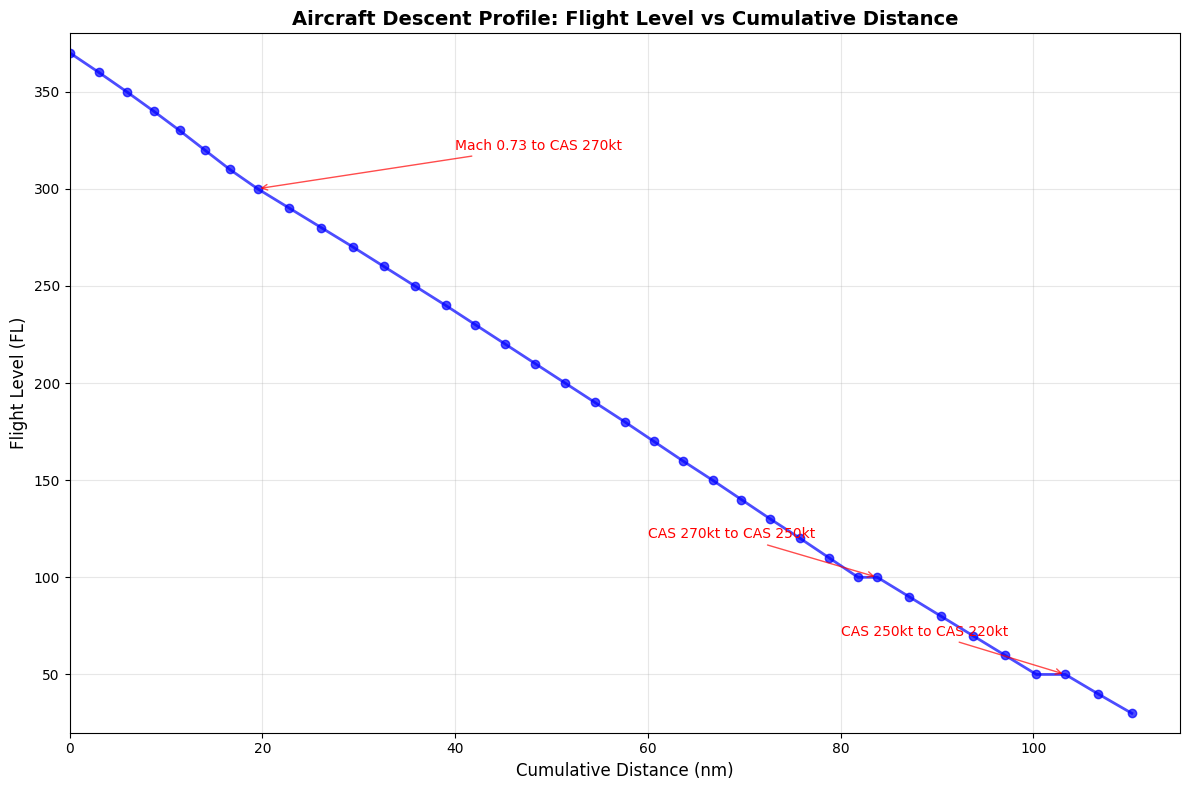

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the data from your table
fl = [370, 360, 350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100, 100, 90, 80, 70, 60, 50, 50, 40, 30]
cumulative_distance = [0.0, 3.0, 5.9, 8.7, 11.4, 14.0, 16.6, 19.5, 22.8, 26.1, 29.4, 32.6, 35.8, 39.0, 42.1, 45.2, 48.3, 51.4, 54.5, 57.6, 60.6, 63.6, 66.7, 69.7, 72.7, 75.8, 78.8, 81.8, 83.8, 87.1, 90.4, 93.7, 97.0, 100.3, 103.3, 106.7, 110.2]

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(cumulative_distance, fl, 'b-o', linewidth=2, markersize=6, alpha=0.7)
plt.xlabel('Cumulative Distance (nm)', fontsize=12)
plt.ylabel('Flight Level (FL)', fontsize=12)
plt.title('Aircraft Descent Profile: Flight Level vs Cumulative Distance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add some formatting
plt.xlim(0, max(cumulative_distance) + 5)
plt.ylim(min(fl) - 10, max(fl) + 10)

# Add annotations for key transition points
plt.annotate('Mach 0.73 to CAS 270kt', xy=(19.5, 300), xytext=(40, 320),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, color='red')
plt.annotate('CAS 270kt to CAS 250kt', xy=(83.8, 100), xytext=(60, 120),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, color='red')
plt.annotate('CAS 250kt to CAS 220kt', xy=(103.3, 50), xytext=(80, 70),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, color='red')

plt.tight_layout()
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

# 示例数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)")
ax.legend()

# 在 notebook 里显示交互式图
mpld3.display()

